In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ta

In [2]:
btc_raw_df = pd.read_parquet("/home/giujorge/Documents/Projets/bot_strategies/data/raw/BTC-USDT.csv.parquet.gzip")
btc_raw_df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.77518300,1502942459999,7564.90685084,3,0.07518300,320.39085084,7960.54017996
2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.00000000,1502942519999,0.00000000,0,0.00000000,0.00000000,7960.45262989
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.26107400,1502942579999,1117.54292144,2,0.26107400,1117.54292144,7960.37529526
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.01200800,1502942639999,51.17185184,3,0.01200800,51.17185184,7960.37529526
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.14079600,1502942699999,599.99933808,1,0.14079600,599.99933808,7960.37529526
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-18 14:09:00,39423.05,39423.06,39377.05,39385.62,22.37338000,1650290999999,881512.83100580,758,6.59638000,259885.09290650,0
2022-04-18 14:10:00,39385.61,39401.54,39370.24,39400.00,29.43069000,1650291059999,1159033.25545720,788,14.55146000,573044.31840130,0
2022-04-18 14:11:00,39400.00,39444.80,39399.83,39442.55,25.65637000,1650291119999,1011437.53518520,720,13.72377000,541044.94403500,0


In [16]:
def RSIcalc(df) :
    df['MA200'] = df.close.rolling(window=200).mean()
    df["price_change"]= df.close.pct_change()
    df['upmove'] = df.price_change.apply(lambda x : x if x> 0 else 0)
    df['downmove'] = df.price_change.apply(lambda x: abs(x) if x < 0 else 0)
    df['avg_up'] = df.upmove.ewm(span=19).mean()
    df['avg_down'] = df.downmove.ewm(span=19).mean()
    df = df.dropna()
    df['RS'] = df.avg_up / df.avg_down
    df['RSI'] = df.RS.apply(lambda x : 100-(100/(x + 1)))
    df.loc[(df['close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
    df.loc[(df['close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'
    return df

In [22]:
def getSignals(df):
    Buying_dates = []
    Selling_dates = []
    
    for i in range(len(df)):
        if "Yes" in df['Buy'].iloc[i]:
            Buying_dates.append(df.iloc[i + 1].name)
            for j in range(1,11):
                if df['RSI'].iloc[i + j] > 40 :
                    Selling_dates.append(df.iloc[i + j + 1].name)
                    break
                elif j == 10:
                    Selling_dates.append(df.iloc[i + j + 1].name)
    return Buying_dates, Selling_dates

In [23]:
frame = RSIcalc(btc_raw_df)
buy, sell = getSignals(frame)


/tmp/ipykernel_493986/3831909497.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df.avg_up / df.avg_down
/tmp/ipykernel_493986/3831909497.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df.RS.apply(lambda x : 100-(100/(x + 1)))
/tmp/ipykernel_493986/3831909497.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

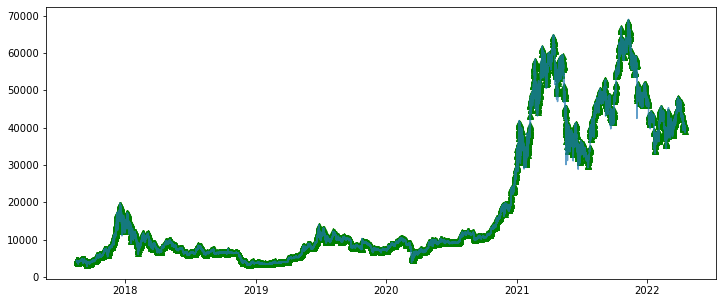

In [25]:
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[buy].index, frame.loc[buy]['close'], marker='^', c= 'g')
plt.plot(frame['close'], alpha=0.7)

In [28]:
Profits = (frame.loc[sell].open.values - frame.loc[buy].open.values) / frame.loc[buy].open.values

In [29]:
Profits

array([-0.00584717, -0.00584717, -0.00584717, ...,  0.00070805,
       -0.0007584 ,  0.00034731])

In [30]:
wins= [i for i in Profits if i > 0]

In [32]:
len(wins)/len(Profits)

0.7040989799773328

In [33]:
len(Profits)

21176

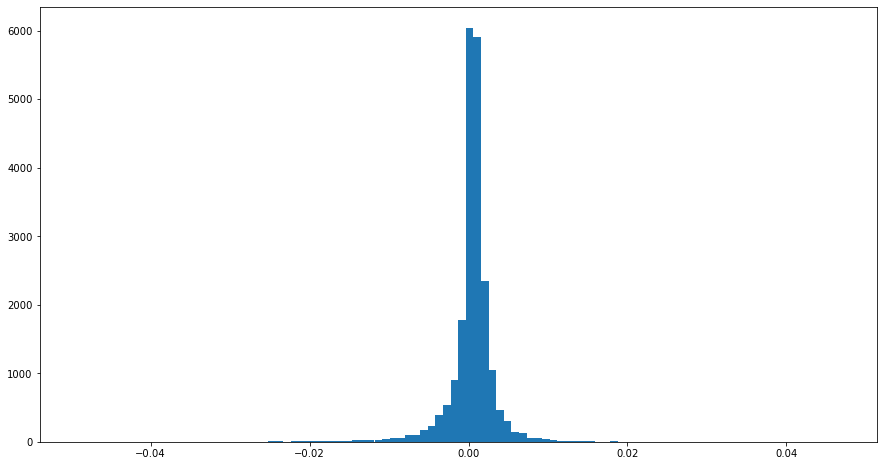

In [39]:
plt.figure(figsize=(15,8))
plt.hist(Profits, bins=100)
plt.show()

In [ ]:
# suite repirse des fonctions précendentes

In [3]:
btc_raw_df['SMA200'] = ta.trend.sma_indicator(btc_raw_df.close, window=200)

In [4]:
btc_raw_df['RSI'] = ta.momentum.rsi(btc_raw_df.close, window=10)

In [7]:
    btc_raw_df['Signal'] = np.where((btc_raw_df.close > btc_raw_df.SMA200) & (btc_raw_df.RSI < 30), True, False)

In [8]:
Buying_dates = []
Selling_dates = []

for i in range(len(btc_raw_df)):
    if btc_raw_df.Signal.iloc[i]:
        Buying_dates.append(btc_raw_df.iloc[i + 1].name)
        for j in range(1, 11):
            if btc_raw_df.RSI.iloc[i +j] > 40:
                Selling_dates.append(btc_raw_df.iloc[i+j +1].name)
                break
            elif j == 10:
                Selling_dates.append(btc_raw_df.iloc[i+j +1].name)

In [9]:
frame = pd.DataFrame({'Buying_dates' : Buying_dates, 'Selling_dates': Selling_dates})
frame

,Buying_dates,Selling_dates
0,2017-08-17 07:20:00,2017-08-17 07:30:00
1,2017-08-17 07:21:00,2017-08-17 07:31:00
2,2017-08-17 07:22:00,2017-08-17 07:32:00
3,2017-08-17 07:23:00,2017-08-17 07:33:00
4,2017-08-17 07:24:00,2017-08-17 07:34:00
...,...,...
21230,2022-04-17 20:49:00,2022-04-17 20:59:00
21231,2022-04-17 20:50:00,2022-04-17 21:00:00
21232,2022-04-17 20:51:00,2022-04-17 21:01:00
21233,2022-04-17 21:03:00,2022-04-17 21:13:00


In [11]:
actualtrades = frame[frame.Buying_dates > frame.Selling_dates.shift(1)]

In [13]:
actualtrades = frame[:1].append(actualtrades)
actualtrades

/tmp/ipykernel_352523/179158707.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actualtrades = frame[:1].append(actualtrades)


,Buying_dates,Selling_dates
0,2017-08-17 07:20:00,2017-08-17 07:30:00
10,2017-08-17 09:10:00,2017-08-17 09:20:00
31,2017-08-17 10:07:00,2017-08-17 10:17:00
45,2017-08-17 10:36:00,2017-08-17 10:37:00
46,2017-08-17 11:39:00,2017-08-17 11:49:00
...,...,...
21220,2022-04-17 09:41:00,2022-04-17 09:51:00
21226,2022-04-17 10:42:00,2022-04-17 10:50:00
21230,2022-04-17 20:49:00,2022-04-17 20:59:00
21233,2022-04-17 21:03:00,2022-04-17 21:13:00


# Functions

In [28]:
def getactuals(df):

    Buying_dates = []
    Selling_dates = []

    for i in range(len(df) - 11):
        if df.Signal.iloc[i]:
            Buying_dates.append(df.iloc[i + 1].name)
            for j in range(1, 11):
                if df.RSI.iloc[i +j] > 40:
                    Selling_dates.append(df.iloc[i+j +1].name)
                    break
                elif j == 10:
                    Selling_dates.append(df.iloc[i+j +1].name)

    frame = pd.DataFrame({'Buying_dates' : Buying_dates, 'Selling_dates': Selling_dates})
    actuals = frame[frame.Buying_dates > frame.Selling_dates.shift(1)]

    actuals =frame[:1].append(actuals)
    return actuals


In [30]:
def tacalc(df):
        df['SMA200'] = ta.trend.sma_indicator(df.close, window=200)
        df['RSI'] = ta.momentum.rsi(df.close, window=10)
        df['Signal'] = np.where((df.close > df.SMA200) & (df.RSI < 30), True, False)

In [32]:
tacalc(btc_raw_df)

In [33]:
getactuals(btc_raw_df)

/tmp/ipykernel_352523/3414433373.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actuals =frame[:1].append(actuals)


,Buying_dates,Selling_dates
0,2017-08-17 07:20:00,2017-08-17 07:30:00
10,2017-08-17 09:10:00,2017-08-17 09:20:00
31,2017-08-17 10:07:00,2017-08-17 10:17:00
45,2017-08-17 10:36:00,2017-08-17 10:37:00
46,2017-08-17 11:39:00,2017-08-17 11:49:00
...,...,...
21220,2022-04-17 09:41:00,2022-04-17 09:51:00
21226,2022-04-17 10:42:00,2022-04-17 10:50:00
21230,2022-04-17 20:49:00,2022-04-17 20:59:00
21233,2022-04-17 21:03:00,2022-04-17 21:13:00


In [ ]:
# profit

In [14]:
profits = btc_raw_df.loc[actualtrades.Selling_dates].open.values -btc_raw_df.loc[actualtrades.Buying_dates].open.values

In [15]:
profits

array([-25.24,   0.  ,   0.  , ..., -22.32, -30.51,  13.54])

In [17]:
len([i for i in profits if i > 0]) / len(profits)

0.696631796758248

In [18]:
relprofits = (btc_raw_df.loc[actualtrades.Selling_dates].open.values - btc_raw_df.loc[actualtrades.Buying_dates].open.values) /  btc_raw_df.loc[actualtrades.Buying_dates].open.values

In [19]:
relprofits

array([-0.00584717,  0.        ,  0.        , ..., -0.00055398,
       -0.0007584 ,  0.00034731])

In [20]:
relprofits.mean()

0.00030511986674917706

In [23]:
(relprofits + 1).cumprod()

array([ 0.99415283,  0.99415283,  0.99415283, ..., 13.69070305,
       13.68032004, 13.68507139])

In [24]:
100 * (relprofits + 1).cumprod()[-1]

1368.5071392089537

In [ ]:
(relprofits + 1).cumprod()